In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

In [2]:
conn = sqlite3.connect('data/sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [3]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [4]:
# Mean film rental duration
df['film_rental_duration'].mean()


4.935489902767389

<AxesSubplot:>

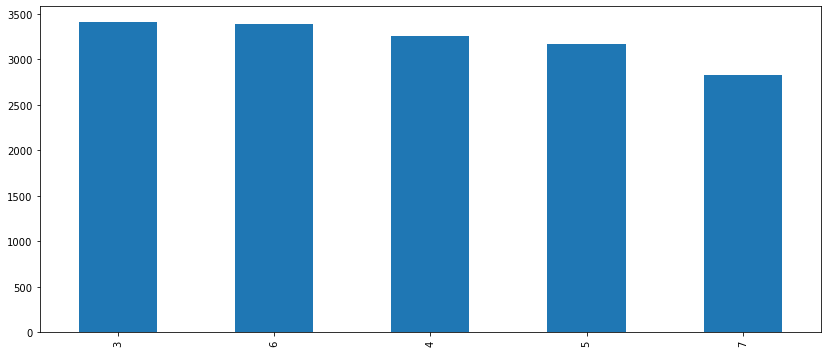

In [6]:
# Bar plot of most common rental duration
df['film_rental_duration'].value_counts().plot(kind='bar', figsize=(14,6))

<AxesSubplot:ylabel='film_rental_rate'>

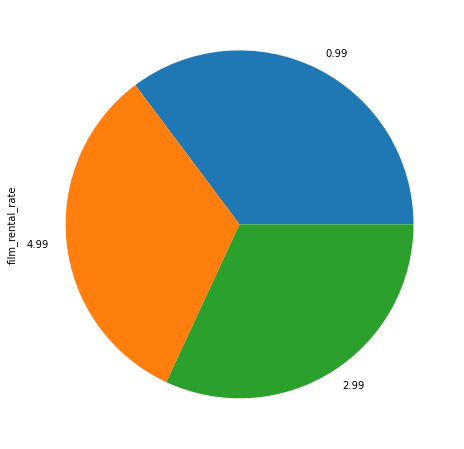

In [7]:
# Pie chart of film rental rates
df['film_rental_rate'].value_counts().plot(kind="pie", figsize=(8,8))

<AxesSubplot:>

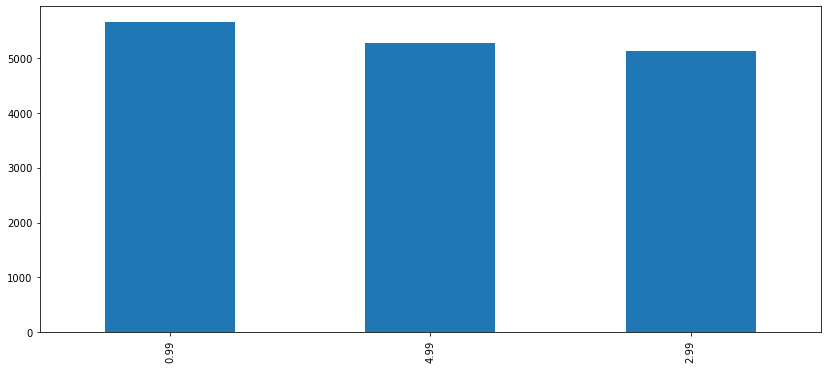

In [8]:
# Bar plot of film rental rate
df['film_rental_rate'].value_counts().plot(kind="bar", figsize=(14,6))

<AxesSubplot:>

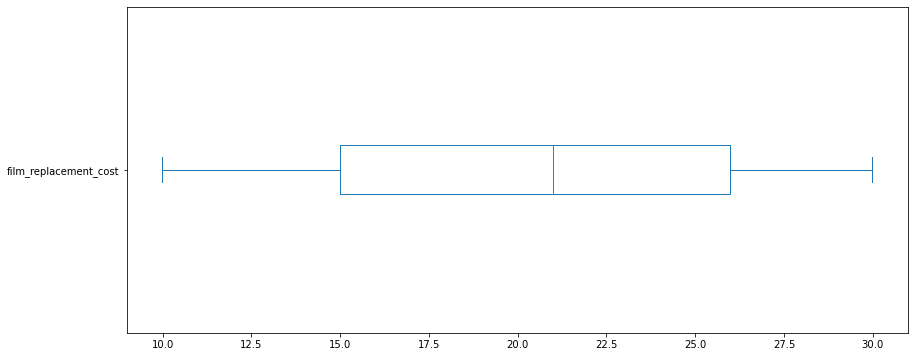

In [9]:
# Distribution of replacement costs - Box Plot
df['film_replacement_cost'].plot(kind='box', vert=False, figsize=(14,6))

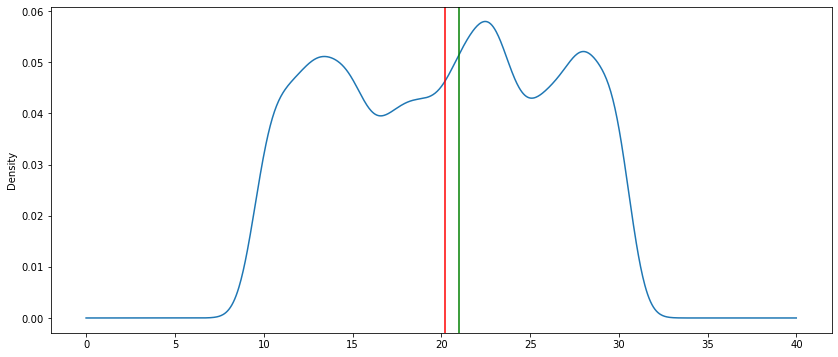

In [11]:
ax = df['film_replacement_cost'].plot(kind='density', figsize=(14,6))
ax.axvline(df['film_replacement_cost'].mean(), color='red')
ax.axvline(df['film_replacement_cost'].median(), color='green')

In [12]:
# Count of film ratings
df['film_rating'].value_counts()

PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: film_rating, dtype: int64

Text(0.5, 1.0, 'Bar Chart of Film Rating')

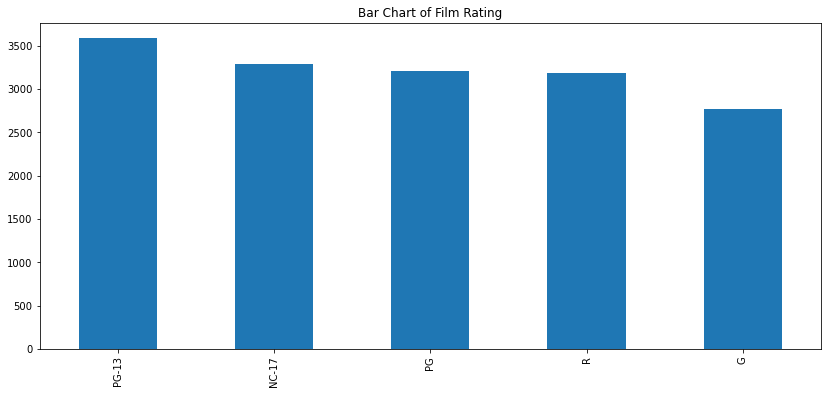

In [14]:
# Bar plot of all film ratings
ax = df['film_rating'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_title("Bar Chart of Film Rating")

Text(0.5, 1.0, 'Correlation between Film Replacement v Film Rating')

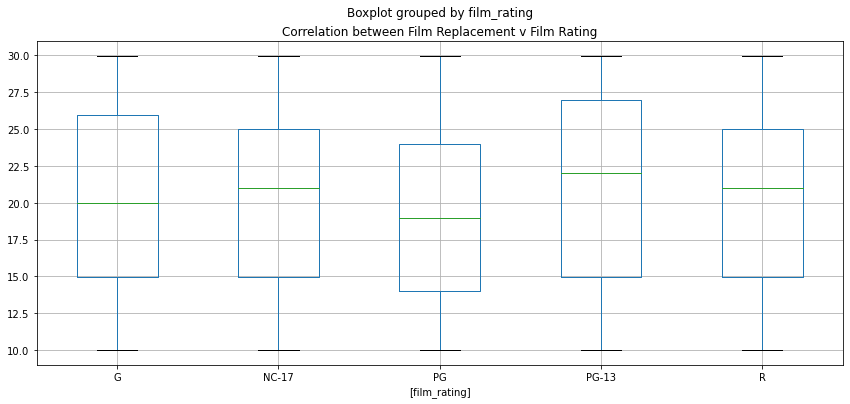

In [15]:
# Check whether film replacement cost vary depending on film rating => Box Plot
ax = df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating', figsize=(14, 6))
ax.set_title('Correlation between Film Replacement v Film Rating')

In [17]:
# Calculate new rental days column
df['rental_delays'] = df[['rental_date', 'return_date']].apply(lambda x: (x[1] - x[0]).days, axis=1)
df['rental_delays'].head()

rental_id
1    1.0
2    3.0
3    7.0
4    9.0
5    8.0
Name: rental_delays, dtype: float64

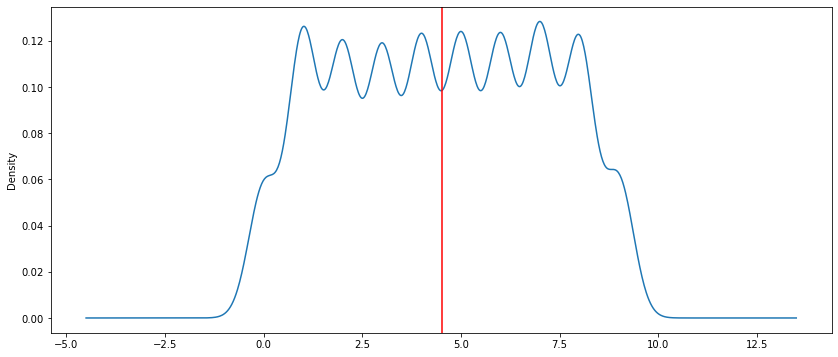

In [19]:
# Mean of Rental Delays
mean = df['rental_delays'].mean()
ax = df['rental_delays'].plot(kind='density', figsize=(14,6))
ax.axvline(mean, color='red')

In [20]:
# Add Film Daily Rental Rate column
df['film_daily_rental_rate'] = df['film_replacement_cost'] / df['film_rental_duration']
df['film_rental_duration'].head()

rental_id
1    7
2    7
3    7
4    6
5    5
Name: film_rental_duration, dtype: int64

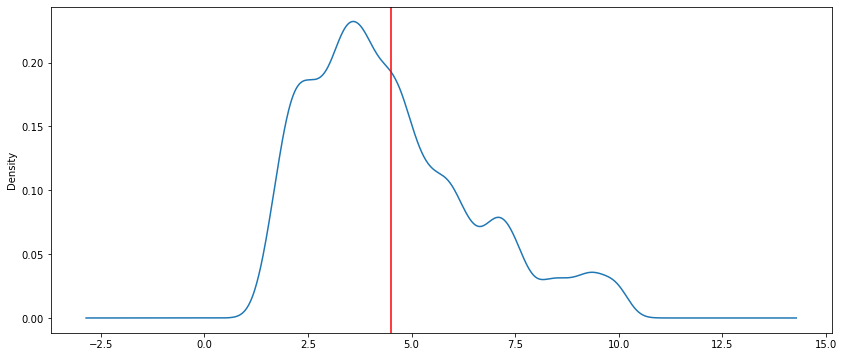

In [21]:
ax = df['film_daily_rental_rate'].plot(kind='density', figsize=(14, 6))
ax.axvline(df['film_daily_rental_rate'].mean(), color='red')

In [23]:
# Films with the lowest daily rental rate
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].min()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_delays,film_daily_rental_rate
rental_id,,,,,,,,,,,,
61,2005-05-25 09:01:57,2005-06-02 07:22:57,FOWLER,1,Lethbridge,TRUMAN CRAZY,7,4.99,9.99,G,7.0,1.427143
87,2005-05-25 13:52:43,2005-05-29 11:12:43,ROBERT,2,Woodridge,GANDHI KWAI,7,0.99,9.99,PG-13,3.0,1.427143
117,2005-05-25 19:30:46,2005-05-31 23:59:46,MILLER,2,Woodridge,VALENTINE VANISHING,7,0.99,9.99,PG-13,6.0,1.427143
197,2005-05-26 06:59:21,2005-06-03 05:04:21,KNOTT,2,Woodridge,TRUMAN CRAZY,7,4.99,9.99,G,7.0,1.427143
364,2005-05-27 07:20:12,2005-05-31 10:44:12,HOULE,1,Lethbridge,CONTROL ANTHEM,7,4.99,9.99,G,4.0,1.427143
471,2005-05-27 21:32:42,2005-05-31 00:39:42,CHAPMAN,2,Woodridge,NOTORIOUS REUNION,7,0.99,9.99,NC-17,3.0,1.427143
535,2005-05-28 06:16:32,2005-05-31 02:48:32,JOY,1,Lethbridge,TRUMAN CRAZY,7,4.99,9.99,G,2.0,1.427143
604,2005-05-28 14:37:07,2005-06-03 11:03:07,MOTLEY,2,Woodridge,GANDHI KWAI,7,0.99,9.99,PG-13,5.0,1.427143
767,2005-05-29 12:20:19,2005-06-02 14:15:19,TORRES,2,Woodridge,CIDER DESIRE,7,2.99,9.99,PG,4.0,1.427143


In [24]:
# Films with the highest daily rental rate
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].max()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_delays,film_daily_rental_rate
rental_id,,,,,,,,,,,,
30,2005-05-25 04:01:32,2005-05-30 03:12:32,HOULE,1,Lethbridge,SONG HEDWIG,3,0.99,29.99,PG-13,4.0,9.996667
88,2005-05-25 14:13:54,2005-05-29 09:32:54,MORRIS,2,Woodridge,JEEPERS WEDDING,3,2.99,29.99,R,3.0,9.996667
94,2005-05-25 16:03:42,2005-05-30 14:23:42,PETERS,1,Lethbridge,GOLDFINGER SENSIBILITY,3,0.99,29.99,G,4.0,9.996667
184,2005-05-26 05:29:49,2005-05-28 10:10:49,GRUBER,2,Woodridge,HONEY TIES,3,0.99,29.99,R,2.0,9.996667
206,2005-05-26 08:01:54,2005-05-27 06:26:54,ARTIS,2,Woodridge,GRAFFITI LOVE,3,0.99,29.99,PG,0.0,9.996667
268,2005-05-26 16:19:08,2005-05-27 14:35:08,SANDERS,1,Lethbridge,GRAFFITI LOVE,3,0.99,29.99,PG,0.0,9.996667
275,2005-05-26 17:09:53,2005-06-04 22:35:53,HENRY,2,Woodridge,GRAFFITI LOVE,3,0.99,29.99,PG,9.0,9.996667
427,2005-05-27 16:10:04,2005-06-05 13:22:04,CRAIG,1,Lethbridge,GOLDFINGER SENSIBILITY,3,0.99,29.99,G,8.0,9.996667
568,2005-05-28 09:57:36,2005-05-31 15:44:36,KNIGHT,1,Lethbridge,JERICHO MULAN,3,2.99,29.99,NC-17,3.0,9.996667


In [26]:
# Rentals in One City
df.loc[df['rental_store_city'] == 'Lethbridge'].shape[0]

7923

<AxesSubplot:>

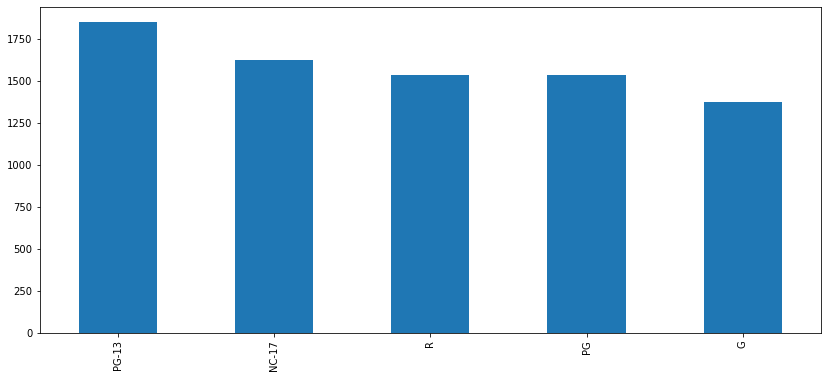

In [27]:
# Rental per film rating in One City
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts()
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts().plot(kind='bar', figsize=(14,6))